Aluno: Guilherme Lima Braga

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD
import tensorflow as tf
import os
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/all_stocks_5yr.csv')

In [ ]:
df = data[data['Name'] == "AAL"]

print(df.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


# RNN

## Pré-processamento

In [ ]:
train_length = round(len(df)*0.7)
lg = len(df)
val_length = lg-train_length

In [ ]:
train_data = df['close'][:train_length,]
val_data = df['close'][train_length:,]

In [ ]:
train=train_data.values.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler()
scaled_trainset = scaler.fit_transform(train)

In [ ]:
x_train = []
y_train = []
step = 50

for i in range(step, train_length):
    x_train.append(scaled_trainset[i-step:i,0])
    y_train.append(scaled_trainset[i,0])

In [ ]:
X_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
y_train.reshape(y_train.shape[0],1)

array([[0.0767431 ],
       [0.08025269],
       [0.07487131],
       [0.08352831],
       [0.08867571],
       [0.09078147],
       [0.08376228],
       [0.09171736],
       [0.09358914],
       [0.0931212 ],
       [0.09265325],
       [0.10107628],
       [0.10201217],
       [0.11090314],
       [0.10996724],
       [0.11885821],
       [0.13547029],
       [0.14272344],
       [0.14014974],
       [0.13032288],
       [0.11534862],
       [0.11488067],
       [0.12096397],
       [0.12143191],
       [0.11932616],
       [0.11254095],
       [0.10879738],
       [0.10645765],
       [0.11020122],
       [0.10832943],
       [0.09195133],
       [0.08469818],
       [0.09358914],
       [0.09920449],
       [0.09124942],
       [0.09031352],
       [0.09335517],
       [0.09148339],
       [0.09195133],
       [0.0982686 ],
       [0.09452504],
       [0.08680393],
       [0.07767899],
       [0.07276556],
       [0.08048666],
       [0.07370145],
       [0.07697707],
       [0.079

## Construção do modelo

In [ ]:
model = Sequential()

model.add(
    SimpleRNN(units = 50,return_sequences= True,input_shape = (X_train.shape[1],1)))

model.add(
    Dropout(0.2))

model.add(
    SimpleRNN(units = 50, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 50, return_sequences = True)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    SimpleRNN(units = 50)
             )

model.add(
    Dropout(0.2)
             )

model.add(
    Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 50, batch_size =32)

Epoch 1/50
26/26 [==============================] - 7s 64ms/step - loss: 0.4939 - accuracy: 0.0012
Epoch 2/50
26/26 [==============================] - 1s 49ms/step - loss: 0.2905 - accuracy: 0.0012
Epoch 3/50
26/26 [==============================] - 1s 48ms/step - loss: 0.2300 - accuracy: 0.0012
Epoch 4/50
26/26 [==============================] - 1s 49ms/step - loss: 0.2262 - accuracy: 0.0012
Epoch 5/50
26/26 [==============================] - 1s 48ms/step - loss: 0.1826 - accuracy: 0.0012
Epoch 6/50
26/26 [==============================] - 1s 48ms/step - loss: 0.1614 - accuracy: 0.0000e+00
Epoch 7/50
26/26 [==============================] - 1s 48ms/step - loss: 0.1266 - accuracy: 0.0012
Epoch 8/50
26/26 [==============================] - 1s 48ms/step - loss: 0.1134 - accuracy: 0.0000e+00
Epoch 9/50
26/26 [==============================] - 2s 72ms/step - loss: 0.1004 - accuracy: 0.0012
Epoch 10/50
26/26 [==============================] - 2s 87ms/step - loss: 0.0841 - accuracy: 0.0012
E

In [ ]:
y_pred = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred.reshape(1,-1))

26/26 [==============================] - 1s 14ms/step


## Plots

In [ ]:
y_train = scaler.inverse_transform(y_train.reshape(1,-1))
y_train

array([[16.3   , 16.45  , 16.22  , 16.59  , 16.81  , 16.9   , 16.6   ,
        16.94  , 17.02  , 17.    , 16.98  , 17.34  , 17.38  , 17.76  ,
        17.72  , 18.1   , 18.81  , 19.12  , 19.01  , 18.59  , 17.95  ,
        17.93  , 18.19  , 18.21  , 18.12  , 17.83  , 17.67  , 17.57  ,
        17.73  , 17.65  , 16.95  , 16.64  , 17.02  , 17.26  , 16.92  ,
        16.88  , 17.01  , 16.93  , 16.95  , 17.22  , 17.06  , 16.73  ,
        16.34  , 16.13  , 16.46  , 16.17  , 16.31  , 16.42  , 16.8   ,
        16.43  , 16.75  , 16.84  , 16.94  , 17.36  , 17.17  , 17.37  ,
        17.56  , 17.76  , 17.95  , 18.45  , 18.42  , 18.23  , 18.15  ,
        18.05  , 18.5   , 18.83  , 19.09  , 19.23  , 19.2   , 19.35  ,
        19.38  , 18.92  , 19.17  , 18.92  , 18.87  , 18.98  , 18.6   ,
        18.82  , 16.36  , 16.17  , 15.72  , 16.01  , 15.64  , 15.8   ,
        15.81  , 16.27  , 16.16  , 16.21  , 15.47  , 15.34  , 15.96  ,
        16.16  , 16.39  , 16.81  , 16.99  , 16.8   , 17.47  , 18.12  ,
      

In [ ]:
y_train.shape
y_train = np.reshape(y_train, (831 ,1))

In [ ]:
y_pred.shape
y_pred = np.reshape(y_pred,(831 ,1))

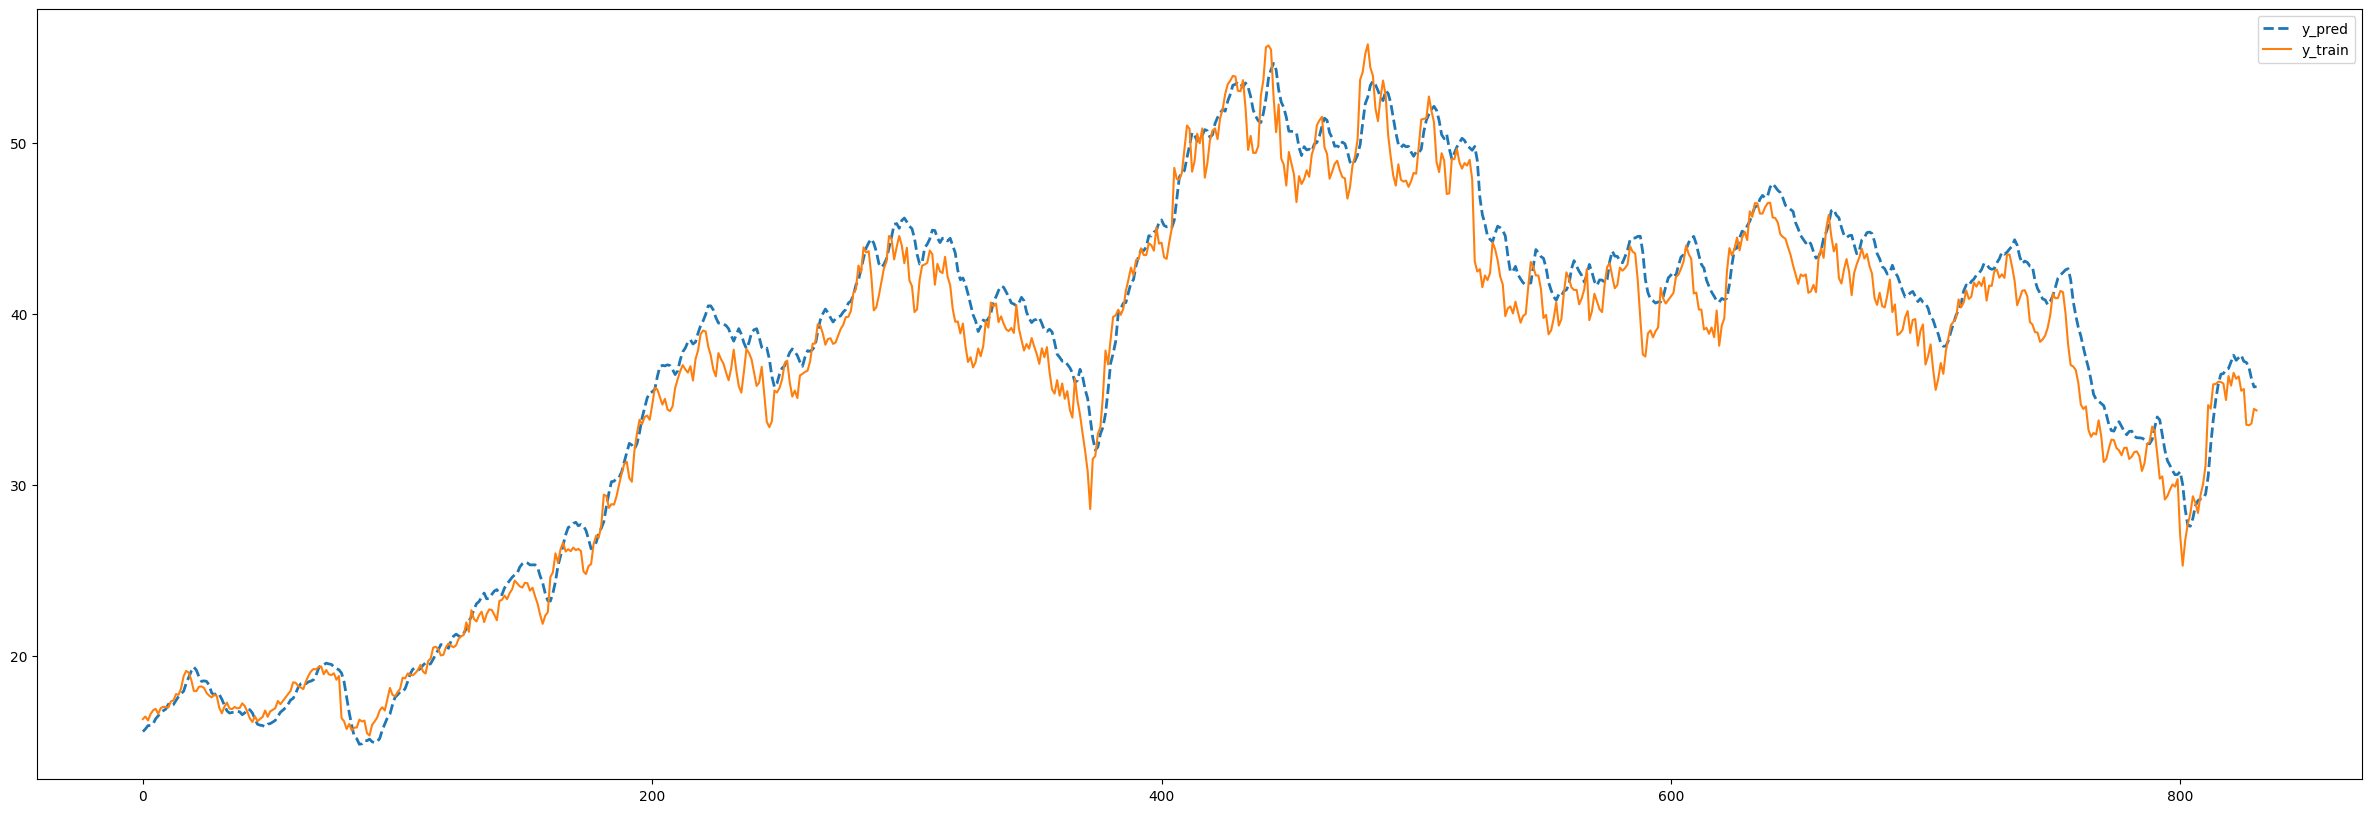

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred, ls = '--', label = 'y_pred', lw = 2)
plt.plot(y_train, label = 'y_train')
plt.legend()
plt.show()

In [ ]:
val = val_data.values.reshape(-1,1)

In [ ]:
scaled_valset = scaler.fit_transform(val)

In [ ]:
xval_train = []
yval_train = []
step = 50

for i in range(step, val_length):
    xval_train.append(scaled_valset[i-step:i,0])
    yval_train.append(scaled_valset[i,0])

In [ ]:
X_val, y_val = np.array(xval_train), np.array(yval_train)

In [ ]:
X_val = np.reshape(X_val, (X_val.shape[0],X_val.shape[1],1))
y_val = np.reshape(y_val, (-1,1))

In [ ]:
y_pred_val = model.predict(X_val)

11/11 [==============================] - 0s 14ms/step


In [ ]:
y_pred_val = scaler.inverse_transform(y_pred_val)

In [ ]:
y_val_is = scaler.inverse_transform(y_val)

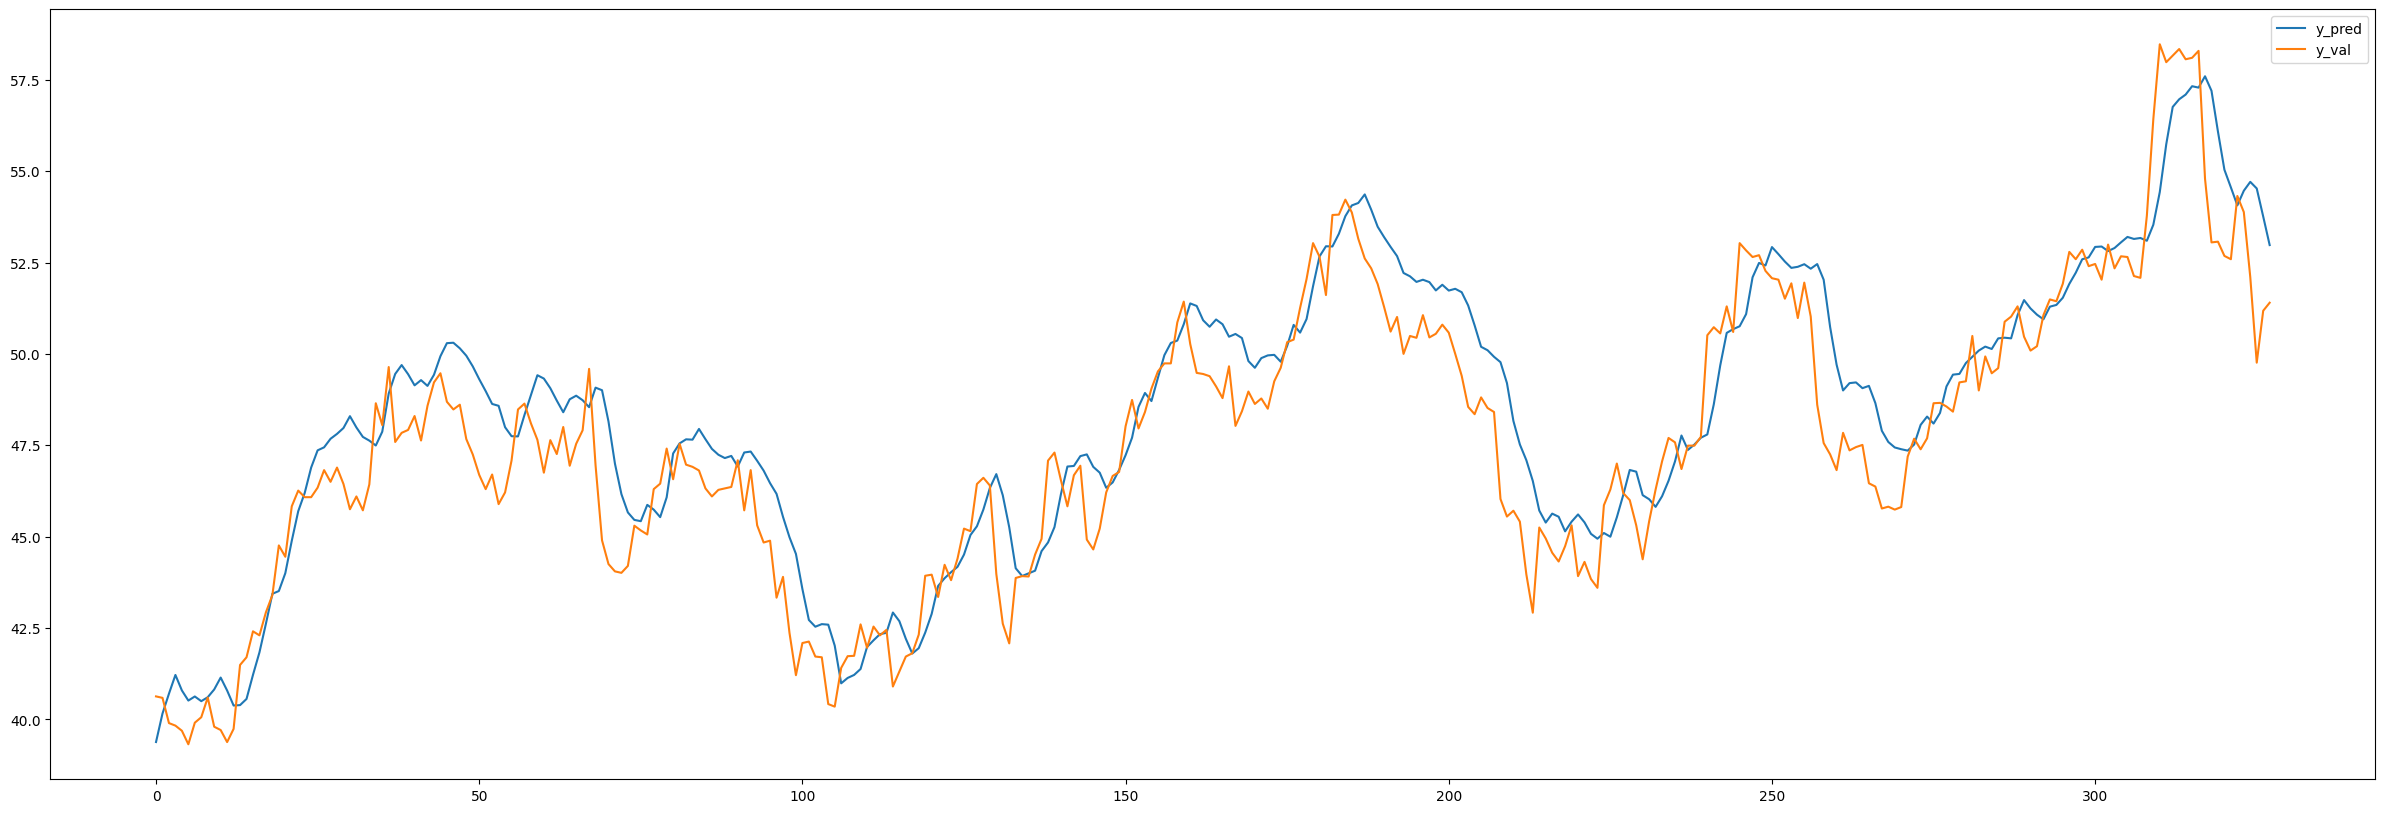

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_val, label = 'y_pred')
plt.plot(y_val_is, label = 'y_val')
plt.legend()
plt.show()

# LSTM

## Pré-processamento

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("Stock price prediction")
    plt.xlabel("time")
    plt.ylabel("Stock price")
    plt.legend()
    plt.show()

In [ ]:
data.shape

(619040, 7)

In [ ]:
df = data[data['Name'] == "AAL"]

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date')

<ipython-input-287-bd1e11233396>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
train = df[:'2016'].iloc[:,1:2].values
test = df['2017':].iloc[:,1:2].values

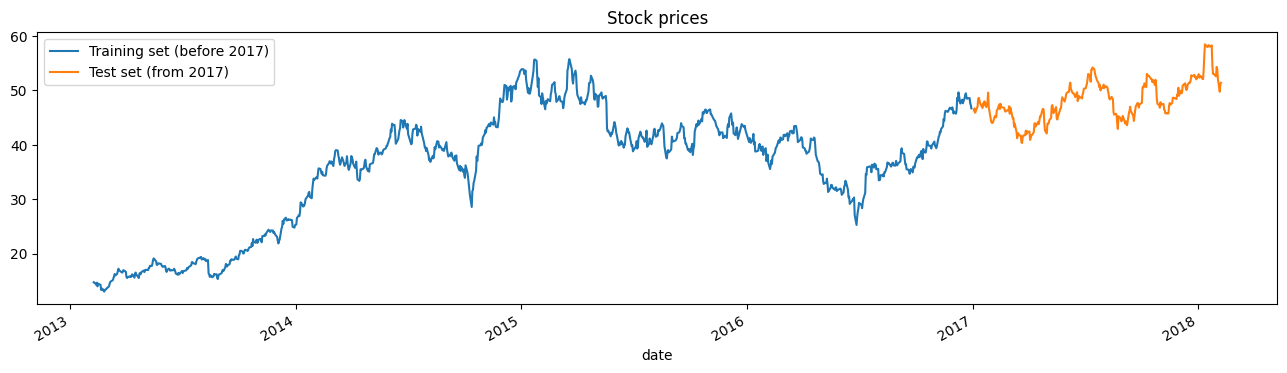

In [ ]:
df["close"][:'2016'].plot(figsize=(16,4), legend=True)
df["close"]["2017":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (from 2017)"])
plt.title("Stock prices")
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
x_train = []
y_train = []

for i in range(60,982 ):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
dataset_total = pd.concat((df['close'][:'2016'], df['close']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(1259,)
(337,)
(337, 1)
(337, 1)


In [ ]:
x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Construção do Modelo

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

regressor.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
29/29 [==============================] - 13s 112ms/step - loss: 0.0395
Epoch 2/50
29/29 [==============================] - 4s 142ms/step - loss: 0.0170
Epoch 3/50
29/29 [==============================] - 5s 174ms/step - loss: 0.0148
Epoch 4/50
29/29 [==============================] - 4s 122ms/step - loss: 0.0149
Epoch 5/50
29/29 [==============================] - 3s 111ms/step - loss: 0.0110
Epoch 6/50
29/29 [==============================] - 3s 111ms/step - loss: 0.0121
Epoch 7/50
29/29 [==============================] - 5s 170ms/step - loss: 0.0106
Epoch 8/50
29/29 [==============================] - 4s 129ms/step - loss: 0.0110
Epoch 9/50
29/29 [==============================] - 3s 111ms/step - loss: 0.0093
Epoch 10/50
29/29 [==============================] - 3s 111ms/step - loss: 0.0088
Epoch 11/50
29/29 [==============================] - 5s 160ms/step - loss: 0.0099
Epoch 12/50
29/29 [==============================] - 4s 136ms/step - loss: 0.0087
Epoch 13/50
29/29 [=====

In [ ]:
dataset_total = pd.concat((df['close'][:'2016'], df['close']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(1259,)
(337,)
(337, 1)
(337, 1)


In [ ]:
x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

8/8 [==============================] - 2s 32ms/step


## Plots

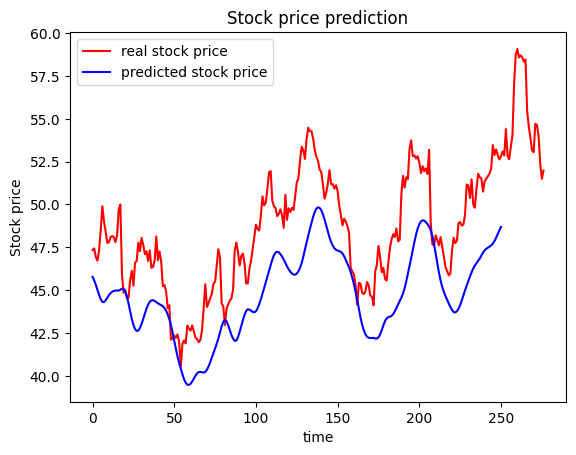

In [ ]:
plot_predictions(test, predicted)

# GRU

## Pré-processamento

In [ ]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="real stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("Stock price prediction")
    plt.xlabel("time")
    plt.ylabel("Stock price")
    plt.legend()
    plt.show()

In [ ]:
data.shape

(619040, 7)

In [ ]:
df = data[data['Name'] == "AAL"]

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df = df.set_index('date')

<ipython-input-186-bd1e11233396>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
df.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
train = df[:'2016'].iloc[:,1:2].values
test = df['2017':].iloc[:,1:2].values

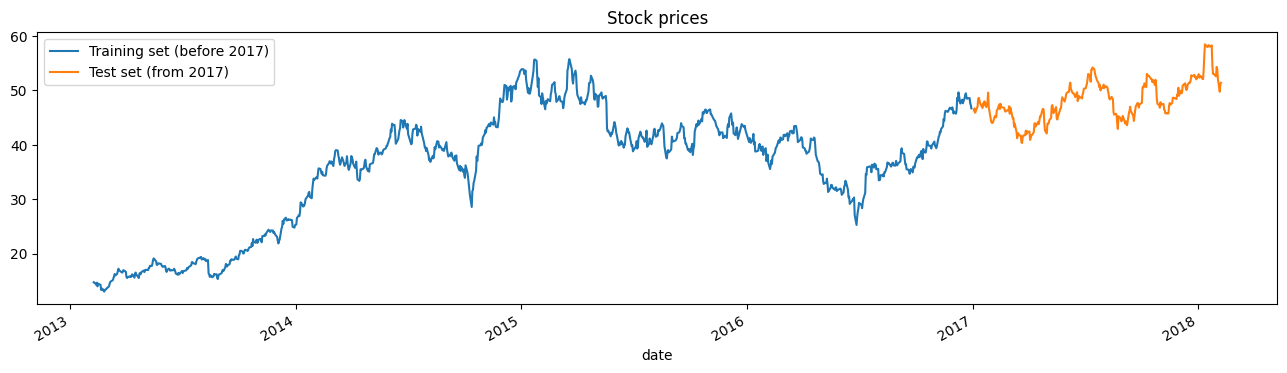

In [ ]:
df["close"][:'2016'].plot(figsize=(16,4), legend=True)
df["close"]["2017":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2017)", "Test set (from 2017)"])
plt.title("Stock prices")
plt.show()

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [ ]:
x_train = []
y_train = []

for i in range(60,982 ):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
dataset_total = pd.concat((df['close'][:'2016'], df['close']['2017':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(1259,)
(337,)
(337, 1)
(337, 1)


In [ ]:
x_test = []
for i in range(60,311):
    x_test.append(inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Construção do modelo

In [ ]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

In [ ]:
regressorGRU.compile(optimizer=SGD(lr=0.01, weight_decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

regressorGRU.fit(x_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
7/7 [==============================] - 13s 369ms/step - loss: 0.1597
Epoch 2/50
7/7 [==============================] - 2s 342ms/step - loss: 0.0961
Epoch 3/50
7/7 [==============================] - 2s 360ms/step - loss: 0.0801
Epoch 4/50
7/7 [==============================] - 3s 370ms/step - loss: 0.0480
Epoch 5/50
7/7 [==============================] - 2s 241ms/step - loss: 0.0319
Epoch 6/50
7/7 [==============================] - 2s 225ms/step - loss: 0.0268
Epoch 7/50
7/7 [==============================] - 2s 226ms/step - loss: 0.0203
Epoch 8/50
7/7 [==============================] - 2s 224ms/step - loss: 0.0143
Epoch 9/50
7/7 [==============================] - 2s 217ms/step - loss: 0.0100
Epoch 10/50
7/7 [==============================] - 2s 228ms/step - loss: 0.0071
Epoch 11/50
7/7 [==============================] - 2s 318ms/step - loss: 0.0050
Epoch 12/50
7/7 [==============================] - 3s 468ms/step - loss: 0.0056
Epoch 13/50
7/7 [==============================]

## Plots

8/8 [==============================] - 0s 29ms/step


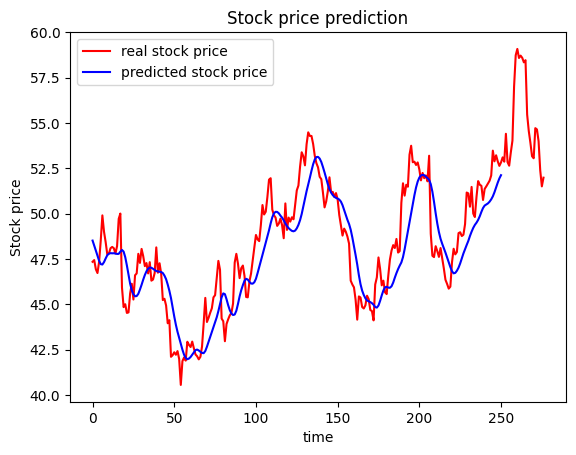

In [ ]:
predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

plot_predictions(test, predicted_with_gru)

# RNN, GRU e LSTM

Tempo de treinamento 50 epochs:

RNN - 1min

LSTM - 2min

GRU- 2min

In [ ]:
pred_rnn= model.predict(x_test)
pred_rnn = scaler.inverse_transform(pred_rnn)

8/8 [==============================] - 1s 15ms/step


In [ ]:
predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = sc.inverse_transform(predicted_with_gru)

8/8 [==============================] - 0s 49ms/step


In [ ]:
predicted = regressor.predict(x_test)
predicted = sc.inverse_transform(predicted)

8/8 [==============================] - 1s 61ms/step


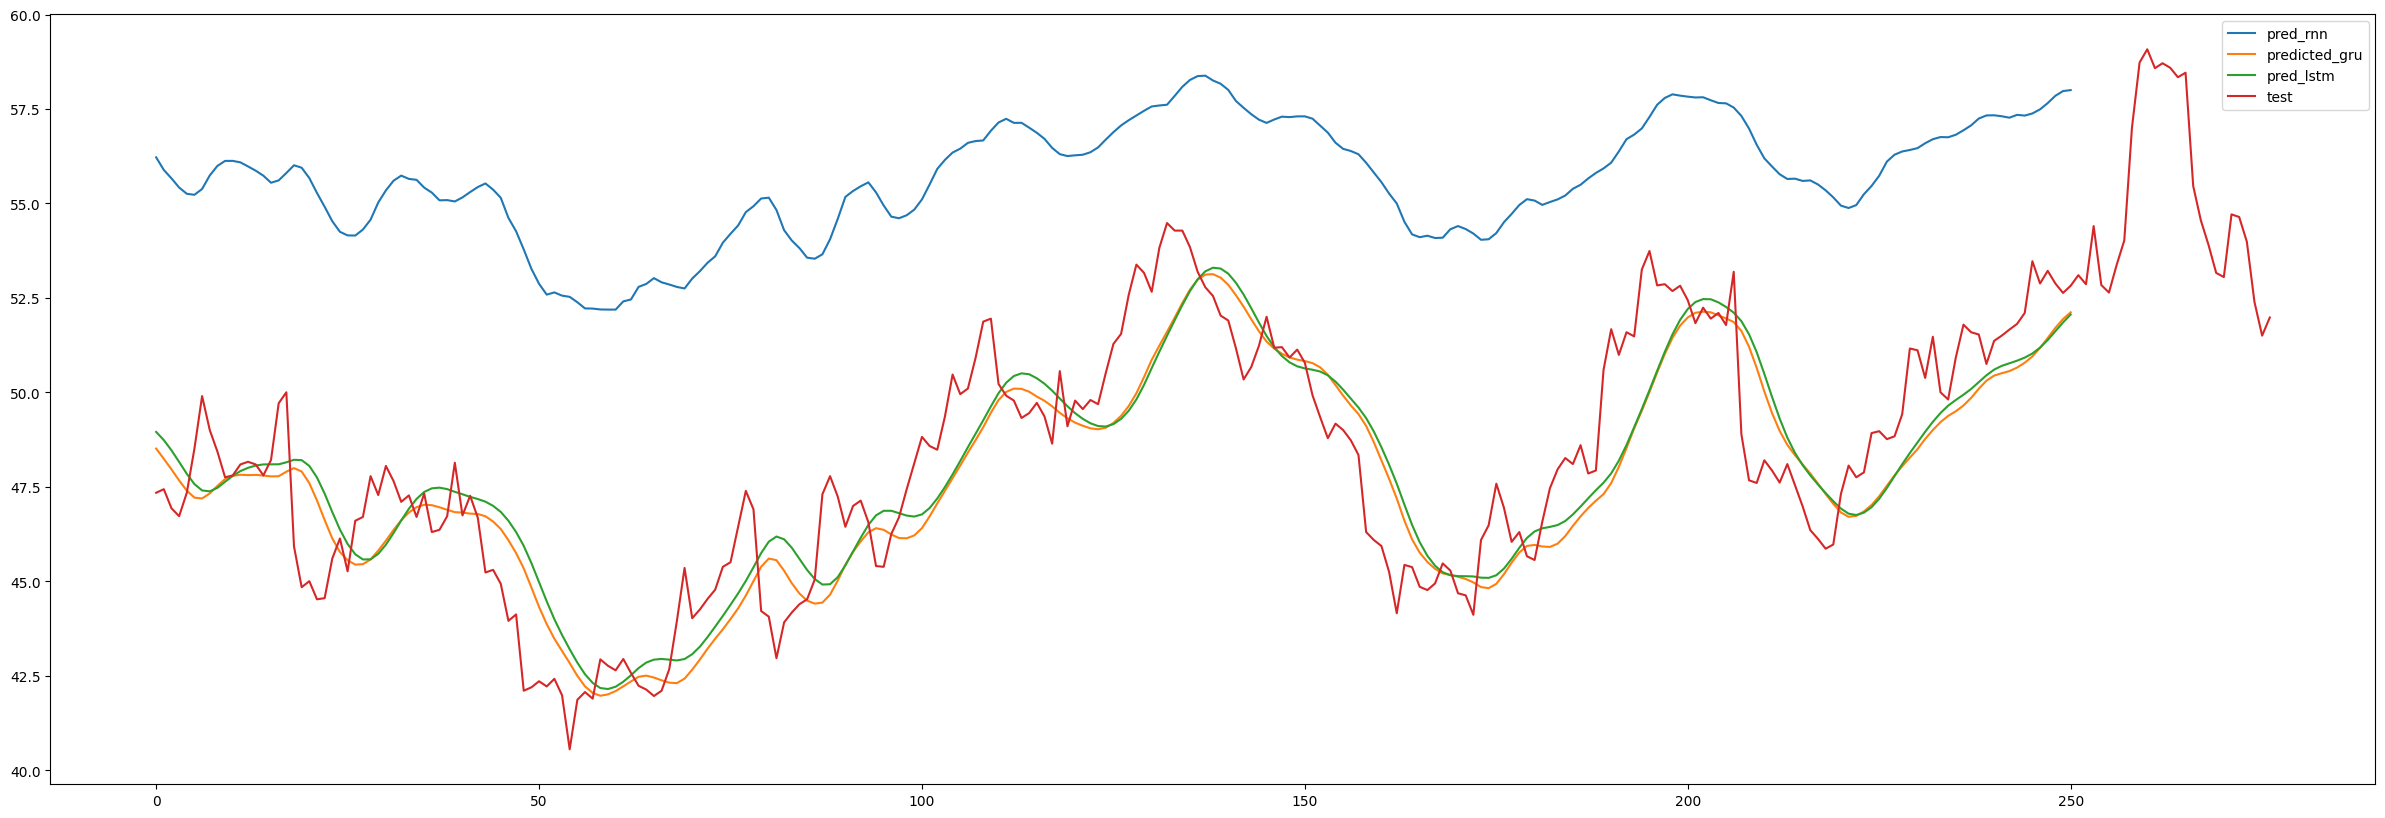

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(pred_rnn, label = 'pred_rnn')
plt.plot(predicted_with_gru, label = 'predicted_gru')
plt.plot(predicted, label = 'pred_lstm')
plt.plot(test, label = 'test')
plt.legend()
plt.show()

11/11 [==============================] - 0s 16ms/step

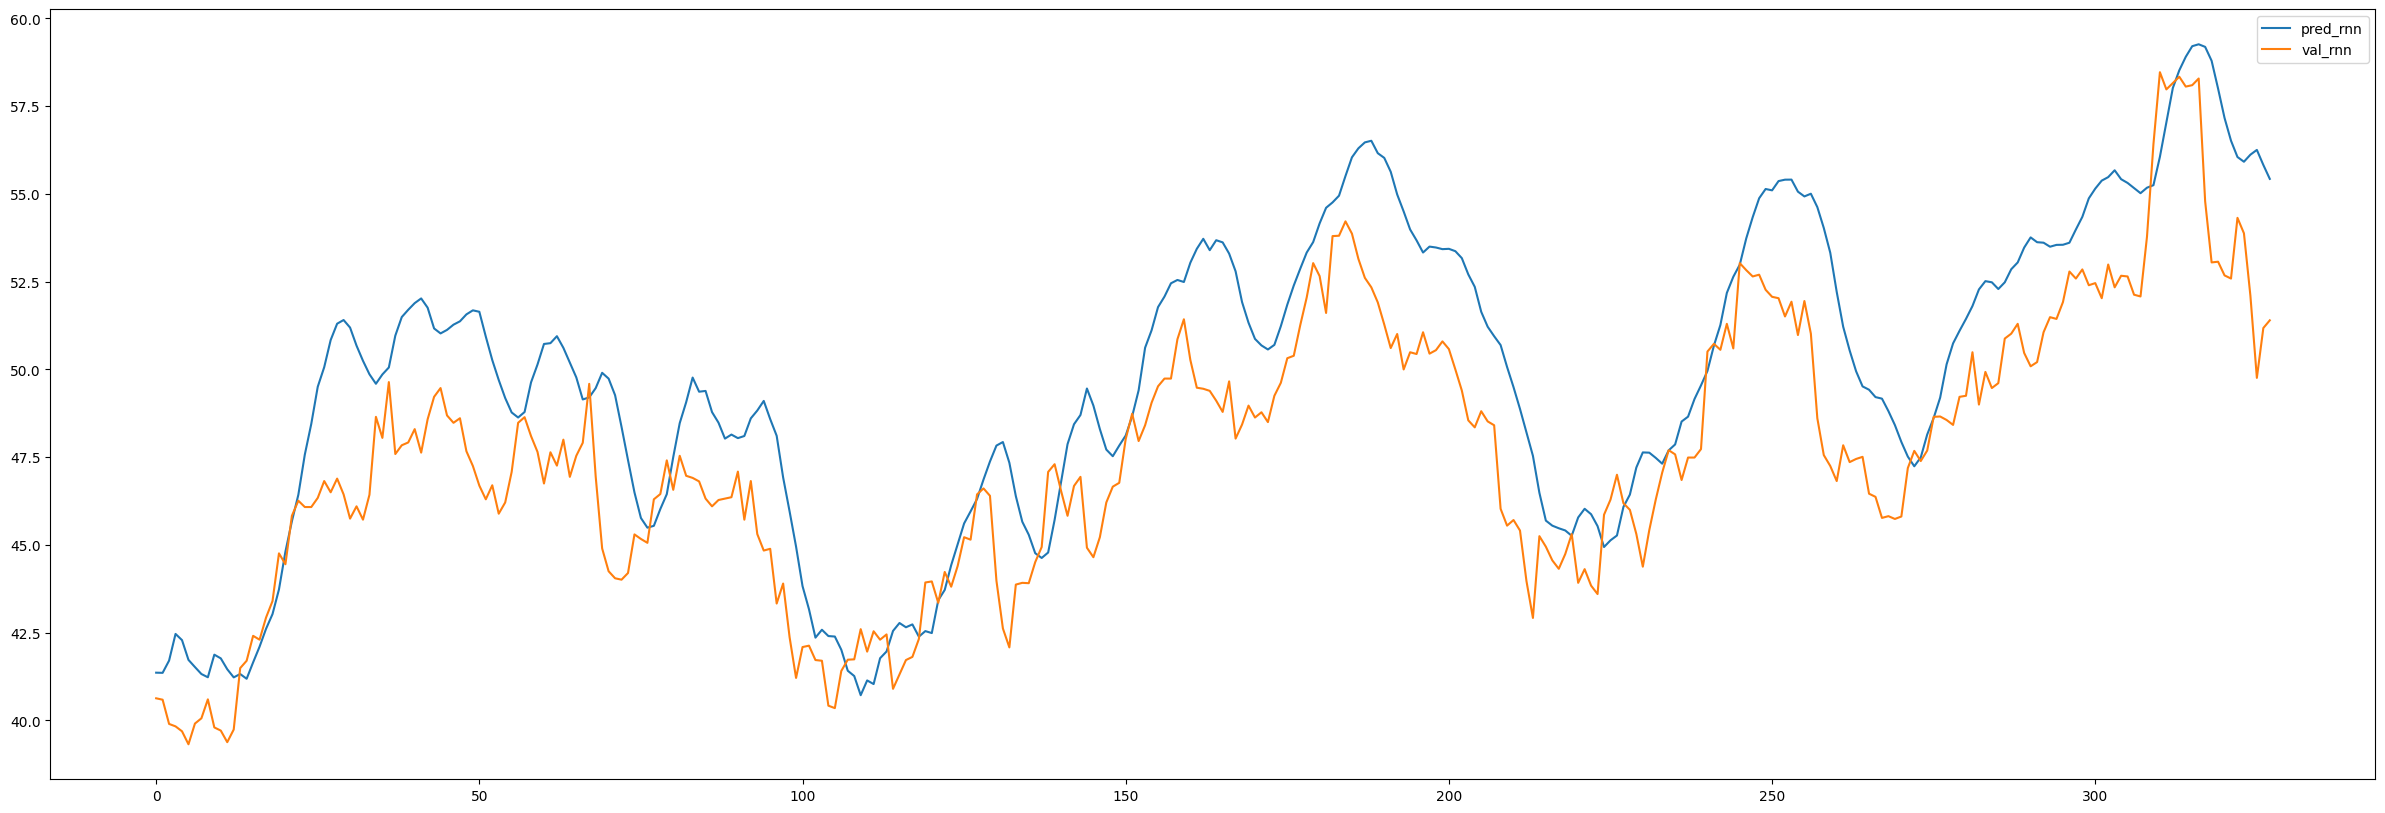

In [ ]:
plt.figure(figsize = (30,10))
plt.plot(y_pred_val, label = 'pred_rnn')
plt.plot(y_val_is, label = 'val_rnn')
plt.legend()
plt.show()